프로그램 6-10의 교차 검증으로 제거 조사에서 가장 성능이 좋았던  Data augmentation을 사용하여
CIFAR-10 데이터에 대하여 epoch 수를 100번으로 늘린 상태로
Model accuracy와 Model loss에 대한 그래프와 정확률을 제시해주세요

 
이때, Data augmentation이 적용되어질 width_shift, height_shift, rotation, horizontal_flip, vertical_flip 등의
수치는 자유로이 선택하여 수행해 주세요.

PPT에 본인이 선택한 Daga augmentation을 적용한 파라미터를 기재해 주시고,
수행 결과에서 정확률과 Model accuracy와 Model loss에 대한 그래프를 캡쳐하여 제출해 주시면 됩니다.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

In [ ]:
#CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
#하이퍼파라미터 설정
batch_siz = 128
n_epoch = 10
k = 5

rotation_range=5.0, width_shift_range=0.5, height_shift_range=0.5, horizontal_flip=False, vertical_flip=True

In [ ]:
#하이퍼 마라미터에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval = x_train[train_index],x_train[val_index]
        ytrain,yval = y_train[train_index],y_train[val_index]

        #신경망 모델 설계
        cnn = Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512, activation='relu'))
        cnn.add(Dropout(dropout_rate[2])) 
        cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

        #신경망을 학습하고 정확률 평가
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        if data_gen:
            generator = ImageDataGenerator(rotation_range=5.0, width_shift_range=0.5, height_shift_range=0.5, horizontal_flip=False, vertical_flip=True)
            cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz), epochs=n_epoch, validation_data=(x_test,y_test), verbose=2)
        else:
            cnn.fit(xtrain, ytrain,batch_size = batch_siz, epochs=n_epoch, validation_data=(x_test,y_test), verbose=2)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

In [ ]:
#하이퍼파라미터를 달리 하며 신경망 모델을 평가
acc_000 = cross_validation(False, [0.0, 0.0, 0.0], 0.0)
acc_001 = cross_validation(False, [0.0, 0.0, 0.0], 0.01)
acc_010 = cross_validation(False, [0.25, 0.25, 0.5], 0.0)
acc_011 = cross_validation(False, [0.25, 0.25, 0.5], 0.01)

Epoch 1/10
313/313 - 35s - loss: 1.5936 - accuracy: 0.4193 - val_loss: 1.2928 - val_accuracy: 0.5308
Epoch 2/10
313/313 - 5s - loss: 1.2012 - accuracy: 0.5730 - val_loss: 1.0873 - val_accuracy: 0.6119
Epoch 3/10
313/313 - 5s - loss: 0.9945 - accuracy: 0.6488 - val_loss: 0.9885 - val_accuracy: 0.6525
Epoch 4/10
313/313 - 5s - loss: 0.8548 - accuracy: 0.6991 - val_loss: 0.9241 - val_accuracy: 0.6839
Epoch 5/10
313/313 - 5s - loss: 0.7350 - accuracy: 0.7444 - val_loss: 0.8481 - val_accuracy: 0.7068
Epoch 6/10
313/313 - 5s - loss: 0.6349 - accuracy: 0.7798 - val_loss: 0.8691 - val_accuracy: 0.7098
Epoch 7/10
313/313 - 5s - loss: 0.5377 - accuracy: 0.8143 - val_loss: 0.8232 - val_accuracy: 0.7266
Epoch 8/10
313/313 - 5s - loss: 0.4379 - accuracy: 0.8480 - val_loss: 0.8942 - val_accuracy: 0.7195
Epoch 9/10
313/313 - 5s - loss: 0.3417 - accuracy: 0.8799 - val_loss: 0.9732 - val_accuracy: 0.7194
Epoch 10/10
313/313 - 5s - loss: 0.2643 - accuracy: 0.9072 - val_loss: 1.0241 - val_accuracy: 0.719

In [ ]:
acc_100 = cross_validation(True, [0.0, 0.0, 0.0], 0.0)
acc_101 = cross_validation(True, [0.0, 0.0, 0.0], 0.01)
acc_110 = cross_validation(True, [0.25, 0.25, 0.5], 0.0)
acc_111 = cross_validation(True, [0.25, 0.25, 0.5], 0.01)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
391/391 - 31s - loss: 1.9702 - accuracy: 0.2486 - val_loss: 1.8327 - val_accuracy: 0.3159
Epoch 2/10
391/391 - 29s - loss: 1.7846 - accuracy: 0.3298 - val_loss: 1.6927 - val_accuracy: 0.3878
Epoch 3/10
391/391 - 29s - loss: 1.6829 - accuracy: 0.3794 - val_loss: 1.5241 - val_accuracy: 0.4422
Epoch 4/10
391/391 - 29s - loss: 1.5997 - accuracy: 0.4122 - val_loss: 1.4066 - val_accuracy: 0.4812
Epoch 5/10
391/391 - 29s - loss: 1.5351 - accuracy: 0.4363 - val_loss: 1.3378 - val_accuracy: 0.5253
Epoch 6/10
391/391 - 31s - loss: 1.4863 - accuracy: 0.4593 - val_loss: 1.3280 - val_accuracy: 0.5141
Epoch 7/10
391/391 - 30s - loss: 1.4518 - accuracy: 0.4699 - val_loss: 1.2840 - val_accuracy: 0.5327
Epoch 8/10
391/391 - 30s - loss: 1.4105 - accuracy: 0.4885 - val_loss: 1.3040 - val_accuracy: 0.5363
Epoch 9/10
391/391 - 32s - loss: 1.3825 - accuracy: 0.4990 - val_loss: 1.2736 - val_accuracy: 0.5364
Epoch 10/10
391/391 - 31s - loss: 1.3589 - accuracy: 0.5082 - val_loss: 1.2243 - val_accura

In [ ]:
print("출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)")
print("[000] (", acc_000, "/",np.array(acc_000).mean(), ")")
print("[001] (", acc_001, "/",np.array(acc_001).mean(), ")")
print("[010] (", acc_010, "/",np.array(acc_010).mean(), ")")
print("[011] (", acc_011, "/",np.array(acc_011).mean(), ")")
print("[100] (", acc_100, "/",np.array(acc_100).mean(), ")")
print("[101] (", acc_101, "/",np.array(acc_101).mean(), ")")
print("[110] (", acc_110, "/",np.array(acc_110).mean(), ")")
print("[111] (", acc_111, "/",np.array(acc_111).mean(), ")")

출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)
[000] ( [0.7232999801635742, 0.713100016117096, 0.739300012588501, 0.715399980545044, 0.7271000146865845] / 0.7236400008201599 )
[001] ( [0.7325000166893005, 0.7224000096321106, 0.7366999983787537, 0.7357000112533569, 0.728600025177002] / 0.7311800122261047 )
[010] ( [0.7578999996185303, 0.7520999908447266, 0.7584999799728394, 0.7383999824523926, 0.753000020980835] / 0.7519799947738648 )
[011] ( [0.7271999716758728, 0.7221999764442444, 0.7498000264167786, 0.7271999716758728, 0.7468000054359436] / 0.7346399903297425 )
[100] ( [0.5684999823570251, 0.5515000224113464, 0.5335999727249146, 0.5220999717712402, 0.5873000025749207] / 0.5525999903678894 )
[101] ( [0.5383999943733215, 0.5188000202178955, 0.559499979019165, 0.5195000171661377, 0.5092999935150146] / 0.5291000008583069 )
[110] ( [0.5152999758720398, 0.5069000124931335, 0.5277000069618225, 0.5239999890327454, 0.5144000053405762] / 0.5176599979400635 )
[111] ( [0.46329998

In [ ]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7f564f564890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f564f687910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f564f695950>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f564f695410>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f564f564e50>,
  <matplotlib.lines.Line2D at 0x7f56519dc650>]}

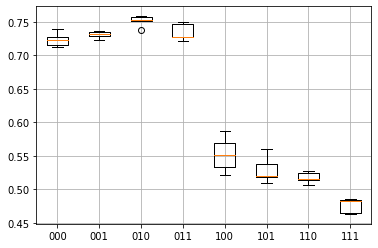

In [ ]:
#박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111], labels=["000","001","010","011","100","101","110","111"])

프로그램 6-10의 교차 검증으로 제거 조사에서 가장 성능이 좋았던  Data augmentation을 사용하여
CIFAR-10 데이터에 대하여 epoch 수를 100번으로 늘린 상태로
Model accuracy와 Model loss에 대한 그래프와 정확률을 제시해주세요

In [ ]:
#신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.25)) 
cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(0.0)))

#신경망을 학습하고 정확률 평가
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train, y_train,batch_size = batch_siz, epochs=100, validation_data=(x_test,y_test), verbose=2)

Epoch 1/100
391/391 - 7s - loss: 1.6204 - accuracy: 0.4054 - val_loss: 1.3924 - val_accuracy: 0.4989
Epoch 2/100
391/391 - 6s - loss: 1.2461 - accuracy: 0.5523 - val_loss: 1.0923 - val_accuracy: 0.6105
Epoch 3/100
391/391 - 6s - loss: 1.0827 - accuracy: 0.6168 - val_loss: 0.9604 - val_accuracy: 0.6627
Epoch 4/100
391/391 - 6s - loss: 0.9697 - accuracy: 0.6588 - val_loss: 0.8724 - val_accuracy: 0.6904
Epoch 5/100
391/391 - 6s - loss: 0.8772 - accuracy: 0.6886 - val_loss: 0.8407 - val_accuracy: 0.7101
Epoch 6/100
391/391 - 6s - loss: 0.8023 - accuracy: 0.7161 - val_loss: 0.7826 - val_accuracy: 0.7246
Epoch 7/100
391/391 - 6s - loss: 0.7342 - accuracy: 0.7414 - val_loss: 0.7392 - val_accuracy: 0.7432
Epoch 8/100
391/391 - 6s - loss: 0.6907 - accuracy: 0.7573 - val_loss: 0.7342 - val_accuracy: 0.7470
Epoch 9/100
391/391 - 6s - loss: 0.6444 - accuracy: 0.7738 - val_loss: 0.7036 - val_accuracy: 0.7628
Epoch 10/100
391/391 - 6s - loss: 0.5981 - accuracy: 0.7897 - val_loss: 0.6727 - val_accura

정확률은 78.5099983215332


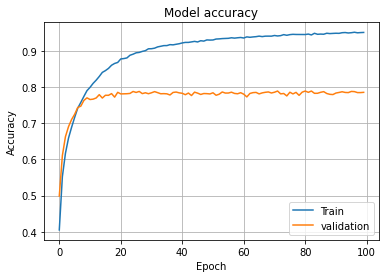

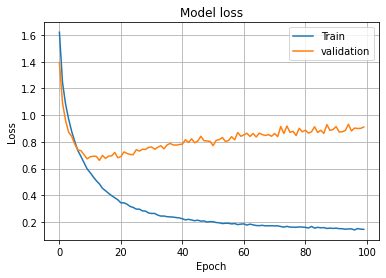

In [ ]:
res=cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

#정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc='best')
plt.grid()
plt.show()

#손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc='best')
plt.grid()
plt.show()